### Importing libraries

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading datasets

In [247]:
import os
for dirname, _, filenames in os.walk('"D:\W\My Portfolio\ML and AI\Solar Panel Performance Optimization\archive (5)"'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [248]:
gen_1 = pd.read_csv(r"D:\W\My Portfolio\ML and AI\Solar Power Performance Optimization\archive (5)\Plant_1_Generation_Data.csv")
gen_2 = pd.read_csv(r"D:\W\My Portfolio\ML and AI\Solar Power Performance Optimization\archive (5)\Plant_2_Generation_Data.csv")
wd_1 = pd.read_csv(r"D:\W\My Portfolio\ML and AI\Solar Power Performance Optimization\archive (5)\Plant_1_Weather_Sensor_Data.csv")
wd_2 = pd.read_csv(r"D:\W\My Portfolio\ML and AI\Solar Power Performance Optimization\archive (5)\Plant_2_Weather_Sensor_Data.csv")

### Data preprocessing

In [249]:
def data_info(data):
    cache = []
    columns = data.columns
    display(data.head(3))
    
    for i in data.columns:
        sample_size = data[i].shape[0]
        dtypes = data[i].dtype
        unique = data[i].nunique()
        
        nan_values = data[i].isnull().sum()
        duplicated = data.duplicated().sum()
        
        cache.append([i,sample_size, dtypes, unique, nan_values, duplicated])

    cache = pd.DataFrame(cache, columns = ["Column", "Sample_Size", "D_Type", "Unique", "Nan_Values", "Duplicated"])
    return cache

In [250]:
gen1_info = data_info(gen_1)
display(gen1_info)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0


,Column,Sample_Size,D_Type,Unique,Nan_Values,Duplicated
0,DATE_TIME,68778,object,3158,0,0
1,PLANT_ID,68778,int64,1,0,0
2,SOURCE_KEY,68778,object,22,0,0
3,DC_POWER,68778,float64,32909,0,0
4,AC_POWER,68778,float64,32686,0,0
5,DAILY_YIELD,68778,float64,29900,0,0
6,TOTAL_YIELD,68778,float64,37267,0,0


In [251]:
wd1_info = data_info(wd_1)
display(wd1_info)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0


,Column,Sample_Size,D_Type,Unique,Nan_Values,Duplicated
0,DATE_TIME,3182,object,3182,0,0
1,PLANT_ID,3182,int64,1,0,0
2,SOURCE_KEY,3182,object,1,0,0
3,AMBIENT_TEMPERATURE,3182,float64,3182,0,0
4,MODULE_TEMPERATURE,3182,float64,3182,0,0
5,IRRADIATION,3182,float64,1758,0,0


In [252]:
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'], format = '%d-%m-%Y %H:%M')
wd_1['DATE_TIME'] = pd.to_datetime(wd_1['DATE_TIME'], format = '%Y-%m-%d %H:%M:%S')

In [253]:
gen_1_new = gen_1.drop(columns = {'PLANT_ID'}, axis = 1)
wd_1_new = wd_1.drop(columns = {'PLANT_ID', 'SOURCE_KEY'}, axis = 1)

In [254]:
merged = pd.merge(gen_1_new, wd_1_new, on = 'DATE_TIME')

In [255]:
merged.head(10)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0
5,2020-05-15,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0,25.184316,22.857507,0.0
6,2020-05-15,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0,25.184316,22.857507,0.0
7,2020-05-15,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0,25.184316,22.857507,0.0
8,2020-05-15,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0,25.184316,22.857507,0.0
9,2020-05-15,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0,25.184316,22.857507,0.0


In [256]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.7+ MB


In [257]:
merged["DATE"] = pd.to_datetime(merged["DATE_TIME"]).dt.date
merged["TIME"] = pd.to_datetime(merged["DATE_TIME"]).dt.time
merged['DAY'] = pd.to_datetime(merged['DATE_TIME']).dt.day
merged['MONTH'] = pd.to_datetime(merged['DATE_TIME']).dt.month

merged['HOURS'] = pd.to_datetime(merged['TIME'],format='%H:%M:%S').dt.hour
merged['MINUTES'] = pd.to_datetime(merged['TIME'],format='%H:%M:%S').dt.minute
merged['TOTAL MINUTES PASS'] = merged['MINUTES'] + merged['HOURS']*60

merged["DATE_STRING"] = merged["DATE"].astype(str)
merged["TIME_STRING"] = merged["TIME"].astype(str)

In [258]:
merged.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,TIME_STRING
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,00:00:00
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,00:00:00
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,00:00:00
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,00:00:00
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,00:00:00


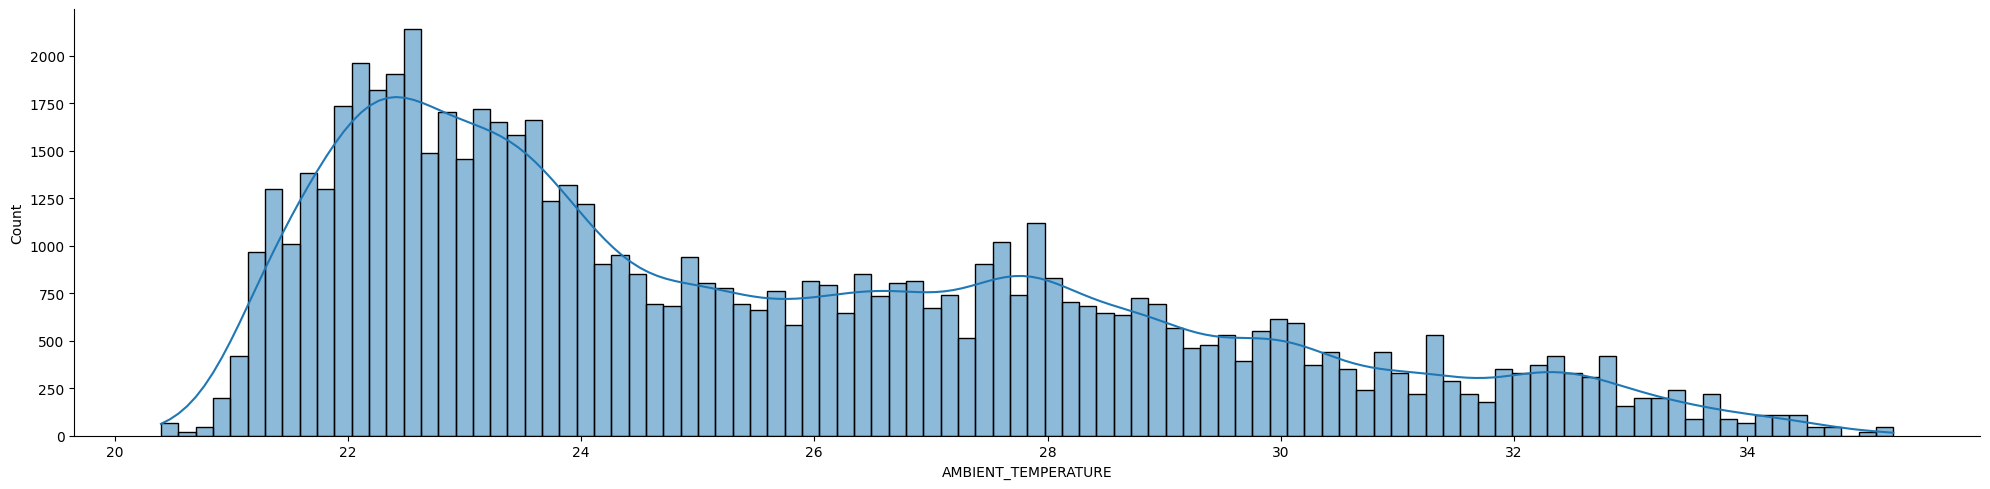

In [259]:
sns.displot(data= merged, x="AMBIENT_TEMPERATURE", kde= True, bins = 100, height=5, aspect=4)

In [260]:
ac_total = merged.groupby(["DATE"])[["AC_POWER"]].sum().add_suffix("_Total")
dc_total = merged.groupby(["DATE"])[["DC_POWER"]].sum().add_suffix("_Total")
ac_total

,AC_POWER_Total
DATE,
2020-05-15,550830.959402
2020-05-16,568359.821428
2020-05-17,660975.389285
2020-05-18,470969.708929
2020-05-19,532250.491070
2020-05-20,525084.567381
2020-05-21,662742.449405
2020-05-22,627830.107975
2020-05-23,745884.287974


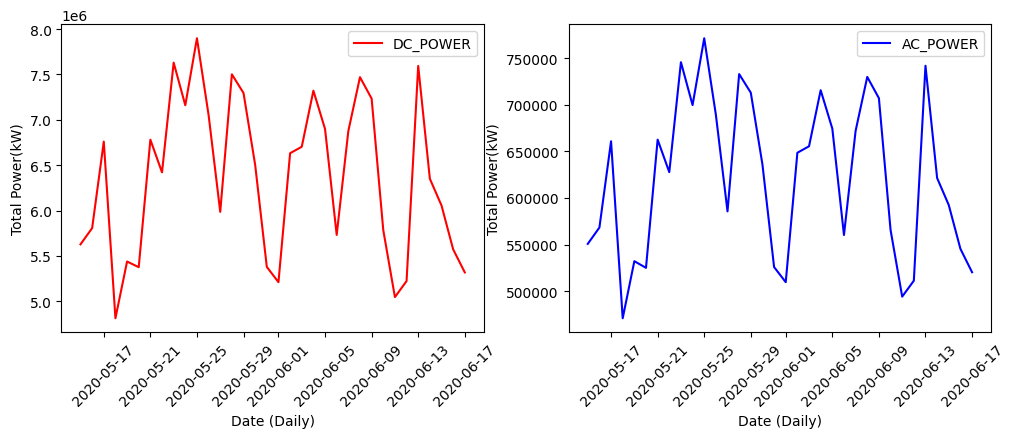

In [261]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2)

sns.lineplot(dc_total["DC_POWER_Total"], label = "DC_POWER", color="red", ax=axs[0], ci = None)
axs[0].tick_params(axis = "x", labelrotation = 45)
axs[0].set(ylabel = "Total Power(kW)", xlabel = "Date (Daily)")
sns.lineplot(ac_total["AC_POWER_Total"], label = "AC_POWER", color="blue", ax=axs[1], ci = None)
axs[1].tick_params(axis = "x", labelrotation = 45)
axs[1].set(ylabel = "Total Power(kW)", xlabel = "Date (Daily)")
plt.show()

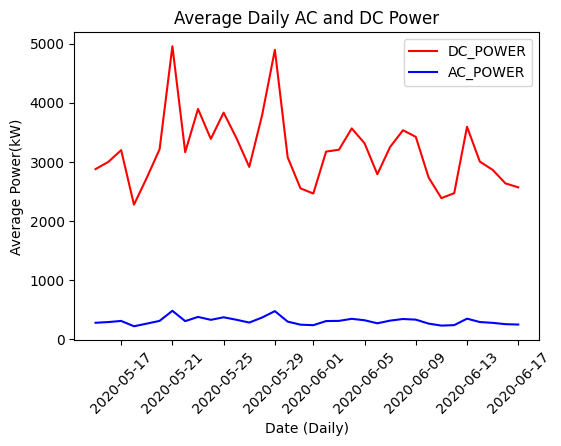

In [262]:
fig,ax=plt.subplots(figsize=(6,4))
sns.lineplot(data= merged, x = "DATE", y= "DC_POWER", label = "DC_POWER", color="red", ax=ax, ci = None)
sns.lineplot(data= merged, x = "DATE", y= "AC_POWER", label = "AC_POWER", color="blue", ax=ax, ci =None)

ax.set_title("Average Daily AC and DC Power")
plt.xlabel("Date (Daily)")
plt.ylabel("Average Power(kW)")
plt.xticks(rotation=45)
ax.legend()
plt.show()

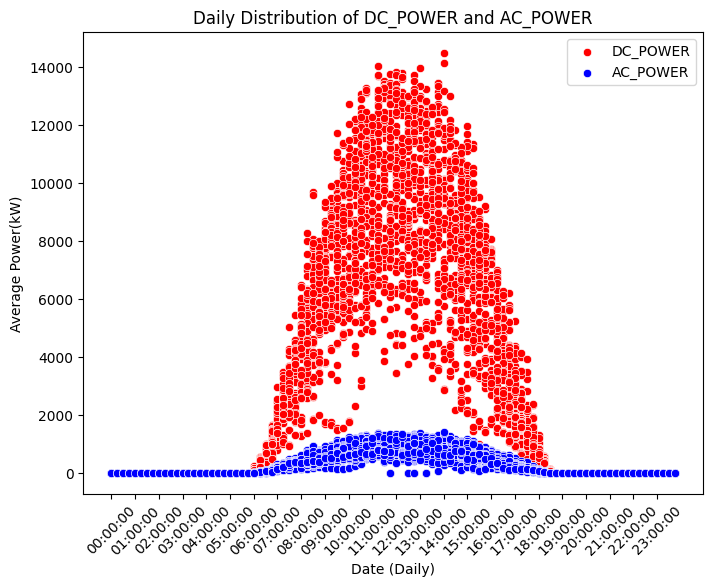

In [285]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data= merged[::12], x = "TIME_STRING", y= "DC_POWER", label = "DC_POWER", color="red", ax=ax)
sns.scatterplot(data= merged[::12], x = "TIME_STRING", y= "AC_POWER", label = "AC_POWER", color="blue", ax=ax)
ax.set_title("Daily Distribution of DC_POWER and AC_POWER")
plt.xlabel("Date (Daily)")
plt.ylabel("Average Power(kW)")
plt.xticks(np.arange(0,96,4), rotation=45)
ax.legend()
plt.show()

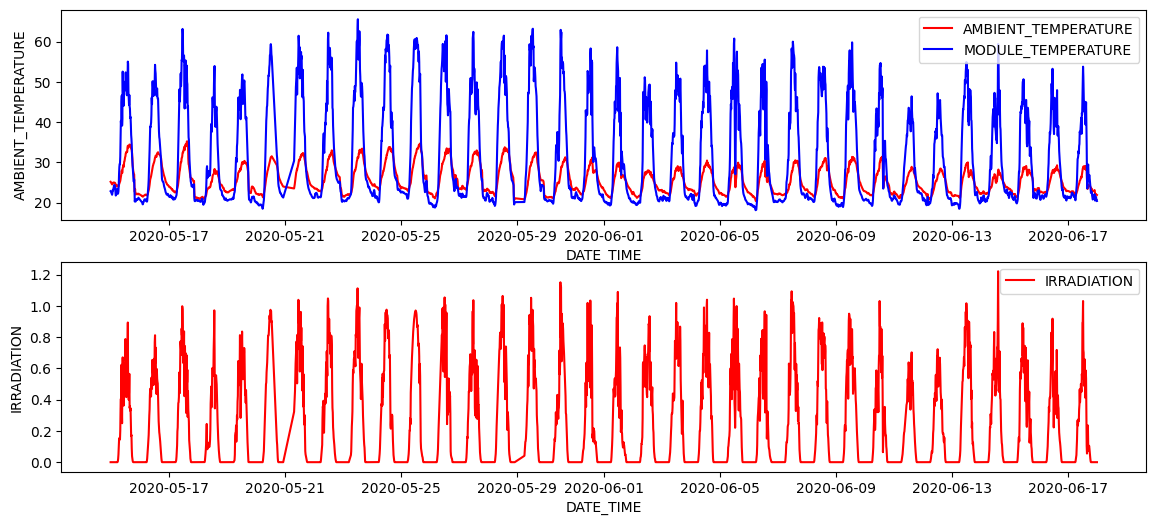

In [264]:
fig,ax=plt.subplots(figsize=(14,6), nrows= 2)
sns.lineplot(data= merged, x = "DATE_TIME", y= "AMBIENT_TEMPERATURE", label = "AMBIENT_TEMPERATURE", color="red", ax=ax[0], ci = None)
sns.lineplot(data= merged, x = "DATE_TIME", y= "MODULE_TEMPERATURE", label = "MODULE_TEMPERATURE", color="blue", ax=ax[0], ci =None)
axs[0].tick_params(axis = "x", labelrotation = 45)
axs[0].set(ylabel = "TEMPERATURE (Celcius)", xlabel = "Date (Daily)")
axs[0].set_title("Trend of TEMPERATURE")

sns.lineplot(data= merged, x = "DATE_TIME", y= "IRRADIATION", label = "IRRADIATION", color="red", ax=ax[1], ci = None)
axs[1].tick_params(axis = "x", labelrotation = 45)
axs[1].set(ylabel = "TEMPERATURE (Celcius)", xlabel = "Date (Daily)")
plt.show()

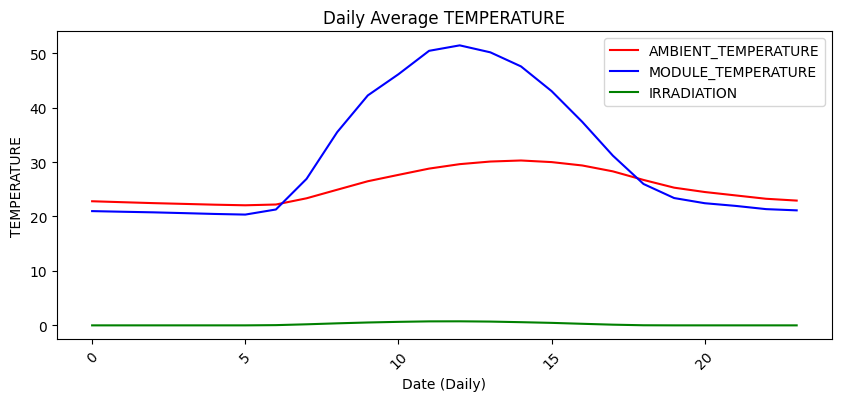

In [265]:
fig,ax=plt.subplots(figsize=(10,4))
sns.lineplot(data= merged, x = "HOURS", y= "AMBIENT_TEMPERATURE", label = "AMBIENT_TEMPERATURE", color="red", ax=ax, ci = None)
sns.lineplot(data= merged, x = "HOURS", y= "MODULE_TEMPERATURE", label = "MODULE_TEMPERATURE", color="blue", ax=ax, ci =None)
sns.lineplot(data= merged, x = "HOURS", y= "IRRADIATION", label = "IRRADIATION", color="green", ax=ax, ci =None)
ax.set_title("Daily Average TEMPERATURE")
plt.xlabel("Date (Daily)")
plt.ylabel("TEMPERATURE")
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [266]:
dc_to_ac_perc = (100* ac_total["AC_POWER_Total"]) / (dc_total["DC_POWER_Total"])

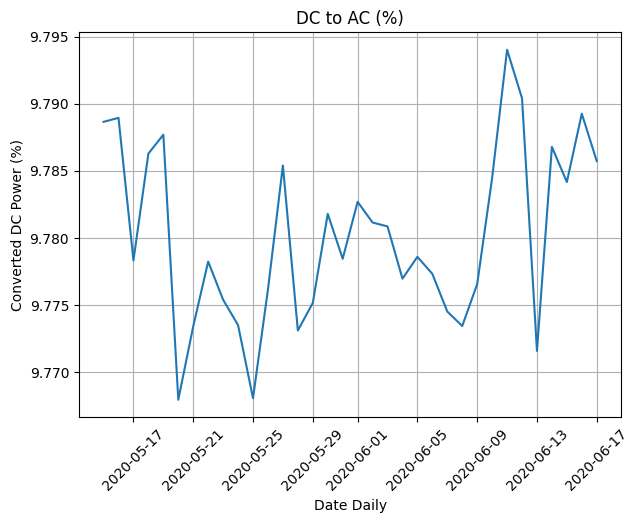

In [267]:
plt.figure(figsize=(7, 5))
dc_to_ac_perc.plot()
plt.title("DC to AC (%)")
plt.xlabel("Date Daily")
plt.ylabel("Converted DC Power (%)")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Sorted Total AC_Power')

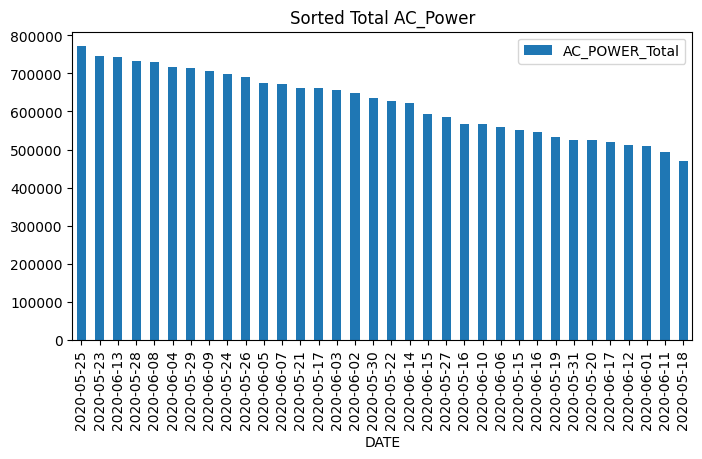

In [268]:
plt.subplots(figsize=(8,4))
ac_total["AC_POWER_Total"].sort_values(ascending=False).plot(kind="bar", legend=True)
plt.title("Sorted Total AC_Power")

In [269]:
merged_highest = merged[merged["DATE_STRING"] == "2020-05-25"]
merged_lowest = merged[merged["DATE_STRING"] == "2020-05-18"]

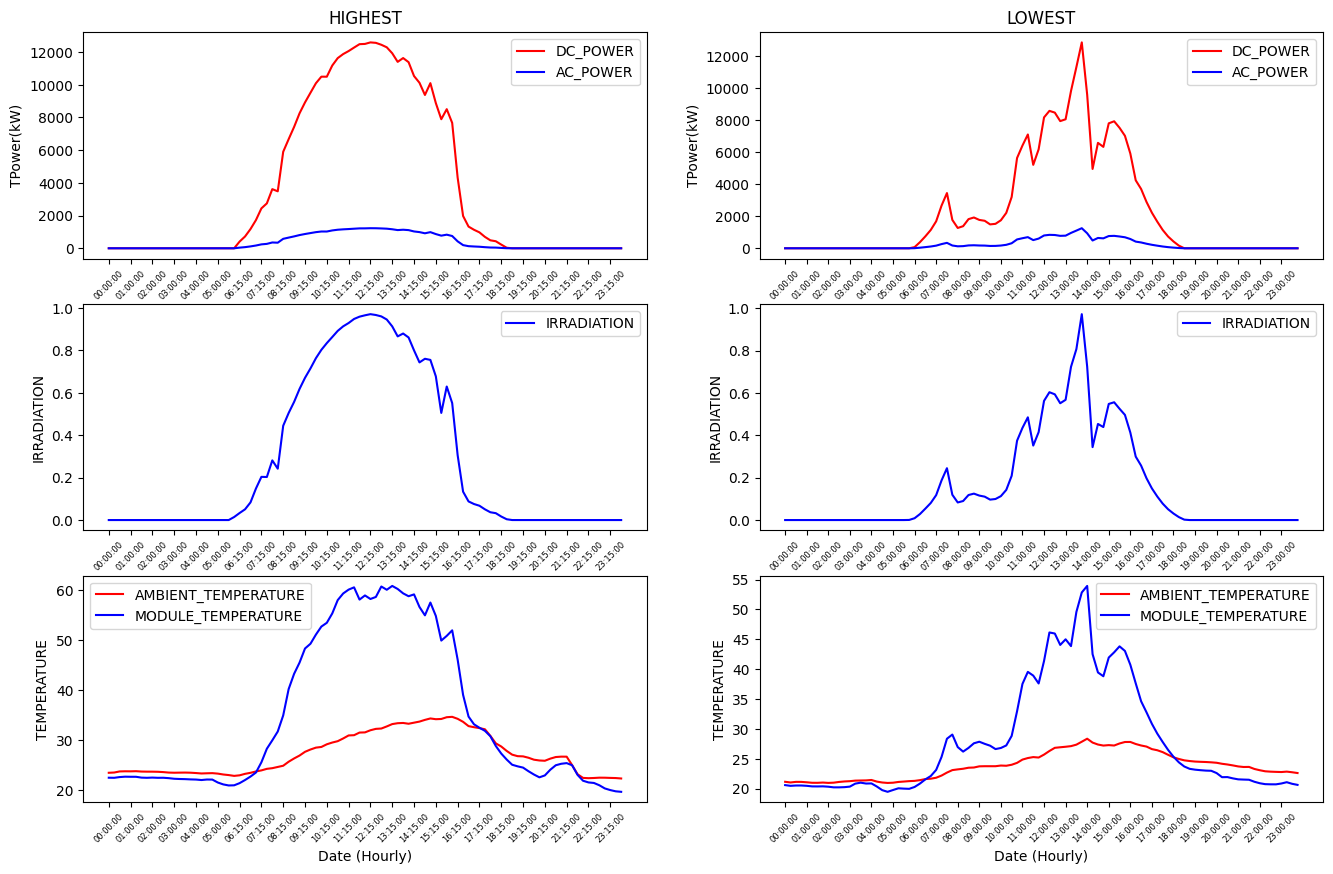

In [270]:
fig, axs = plt.subplots(figsize=(16,10), nrows =3, ncols=2)
######HIGHEST########
sns.lineplot(x = merged_highest["TIME_STRING"],y = merged_highest["DC_POWER"], label = "DC_POWER", color="red", ax=axs[0][0], ci = None)
sns.lineplot(x = merged_highest["TIME_STRING"],y = merged_highest["AC_POWER"], label = "AC_POWER", color="blue", ax=axs[0][0],  ci = None)
axs[0][0].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[0][0].set_xticks(np.arange(0,96,4))
axs[0][0].set(ylabel = "TPower(kW)", xlabel = "Date (Hourly)")
axs[0][0].set_title("HIGHEST")

sns.lineplot(x = merged_highest["TIME_STRING"], y= merged_highest["IRRADIATION"],label = "IRRADIATION", color="blue", ax=axs[1][0], ci = None)
axs[1][0].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[1][0].set_xticks(np.arange(0,96,4))
axs[1][0].set(ylabel = "IRRADIATION", xlabel = "Date (Hourly)")

sns.lineplot(x = merged_highest["TIME_STRING"],y = merged_highest["AMBIENT_TEMPERATURE"], label = "AMBIENT_TEMPERATURE", color="red", ax=axs[2][0], ci = None)
sns.lineplot(x = merged_highest["TIME_STRING"],y = merged_highest["MODULE_TEMPERATURE"], label = "MODULE_TEMPERATURE", color="blue", ax=axs[2][0],  ci = None)
axs[2][0].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[2][0].set_xticks(np.arange(0,96,4))
axs[2][0].set(ylabel = "TEMPERATURE", xlabel = "Date (Hourly)")
###################

######LOWEST########
sns.lineplot(x = merged_lowest["TIME_STRING"],y = merged_lowest["DC_POWER"], label = "DC_POWER", color="red", ax=axs[0][1], ci = None)
sns.lineplot(x = merged_lowest["TIME_STRING"],y = merged_lowest["AC_POWER"], label = "AC_POWER", color="blue", ax=axs[0][1],  ci = None)
axs[0][1].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[0][1].set_xticks(np.arange(0,96,4))
axs[0][1].set(ylabel = "TPower(kW)", xlabel = "Date (Hourly)")
axs[0][1].set_title("LOWEST")

sns.lineplot(x = merged_lowest["TIME_STRING"], y= merged_lowest["IRRADIATION"],label = "IRRADIATION", color="blue", ax=axs[1][1], ci = None)
axs[1][1].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[1][1].set_xticks(np.arange(0,96,4))
axs[1][1].set(ylabel = "IRRADIATION", xlabel = "Date (Hourly)")

sns.lineplot(x = merged_lowest["TIME_STRING"],y = merged_lowest["AMBIENT_TEMPERATURE"], label = "AMBIENT_TEMPERATURE", color="red", ax=axs[2][1], ci = None)
sns.lineplot(x = merged_lowest["TIME_STRING"],y = merged_lowest["MODULE_TEMPERATURE"], label = "MODULE_TEMPERATURE", color="blue", ax=axs[2][1],  ci = None)
axs[2][1].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[2][1].set_xticks(np.arange(0,96,4))
axs[2][1].set(ylabel = "TEMPERATURE", xlabel = "Date (Hourly)")
plt.show()


In [271]:
##Efficieny = (Energy_Output/Engery_Input) * 100
AC_ef = merged[merged["AC_POWER"] > 0]

<Axes: >

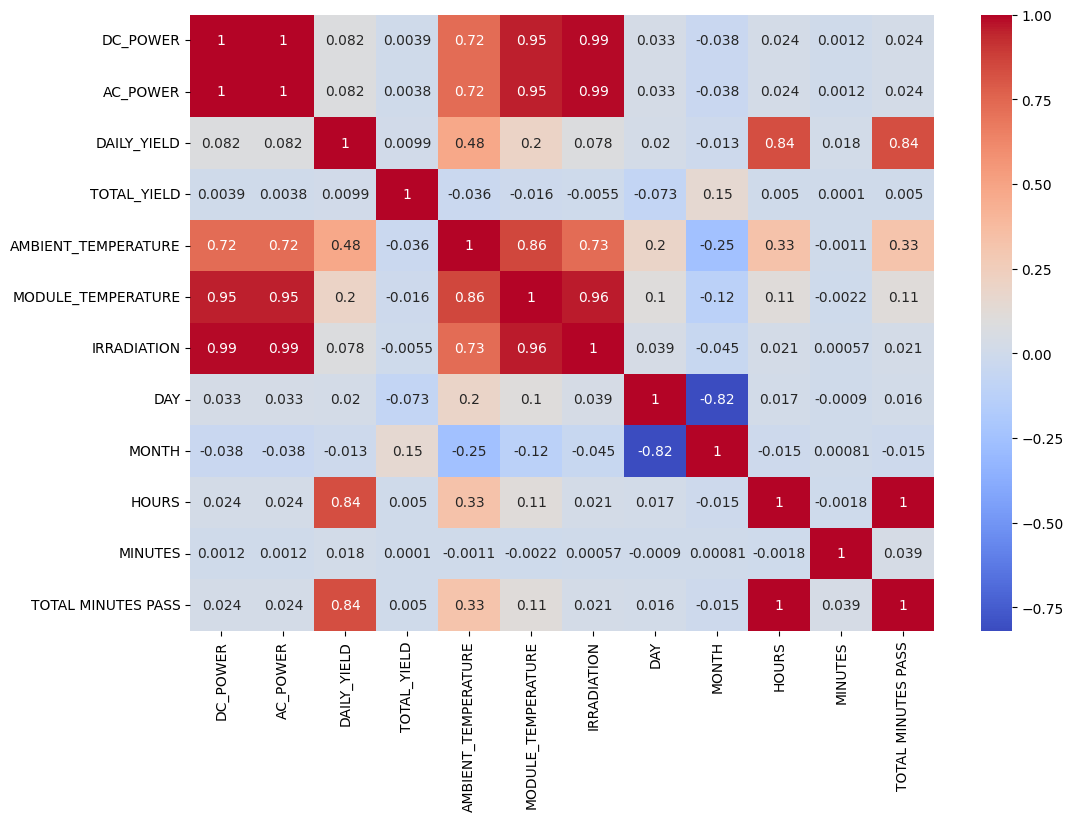

In [272]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged.corr(numeric_only=True),annot=True, cmap = 'coolwarm')

In [273]:
from sklearn.preprocessing import StandardScaler

x = merged[["DAILY_YIELD", "TOTAL_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION", "DC_POWER"]].values
y = merged["AC_POWER"].values

In [274]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [275]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
R2_Score_rfr = (r2_score(y_pred_rfr,y_test) * 100)
MAE_rfr = mean_absolute_error(y_pred_rfr, y_test)

print("R2 Score : ",R2_Score_rfr,"%")
print("MAE : ",MAE_rfr,"")

R2 Score :  99.9999145285789 %
MAE :  0.12497124994444442 


In [276]:
prediction_rfr = rfr.predict(x_test)

In [277]:
cross_checking_rfr = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_rfr})
cross_checking_rfr.head(10)

,Actual,Predicted
0,0.000000,0.000000
1,1190.087500,1190.502857
2,1088.828571,1088.760310
3,134.675000,134.694554
4,1059.371429,1059.524911
5,957.585714,958.007786
6,89.314286,89.318714
7,0.000000,0.000000
8,597.275000,597.256268
9,3.600000,3.572821


In [278]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
R2_Score_lr = (r2_score(y_pred_lr,y_test) * 100)
MAE_lr = mean_absolute_error(y_pred_lr, y_test)
#Make Normalization

print("R2 Score : ",R2_Score_lr,"%")
print("MAE : ",MAE_lr,"")

R2 Score :  99.99940219845737 %
MAE :  0.6513600904748844 


In [279]:
prediction_lr = lr.predict(x_test)

In [280]:
cross_checking_lr = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_lr})
cross_checking_lr.head()

,Actual,Predicted
0,0.000000,0.141637
1,1190.087500,1193.038723
2,1088.828571,1089.684390
3,134.675000,135.574417
4,1059.371429,1061.572642


In [281]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

y_pred_dtr = rfr.predict(x_test)
R2_Score_dtr = (r2_score(y_pred_dtr,y_test) * 100)
MAE_dtr = mean_absolute_error(y_pred_dtr, y_test)

print("R2 Score : ",R2_Score_dtr,"%")
print("MAE : ",MAE_dtr,"")

R2 Score :  99.9999145285789 %
MAE :  0.12497124994444442 


In [282]:
prediction_dtr = dtr.predict(x_test)

In [283]:
cross_checking_dtr = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_dtr})
cross_checking_dtr.head()

,Actual,Predicted
0,0.000000,0.0000
1,1190.087500,1190.5000
2,1088.828571,1088.4375
3,134.675000,134.9000
4,1059.371429,1058.3000
